# Libraries and Version Numbers

The following libraries and library versions will be required to excute this notebook properly. Please note that this notebook was created using a mac osx system, version numbers may differ on other operating systems.
 
1. anaconda-client==1.6.14
2. anaconda-navigator==1.8.2
3. anaconda-project==0.8.0
4. conda==4.5.0 
5. conda-build==3.0.22 
6. conda-verify==2.0.0 

7. matplotlib==2.0.2
8. scikit-image==0.13.0
9. scikit-learn==0.19.0

10. scipy==0.19.1
    10.a. numpy==1.13.1 (part of numpy)
    10.b. numpydoc==0.7.0 (part of numpy)
    10.c. pandas==0.20.3 (part of numpy)
    10.d. pandocfilters==1.4.2 (part of numpy)

11. seaborn==0.8

# Installation of Libraries

It is highly recommended that the aforementioned libraries are installed via Anaconda Distribution.
Please download and install Anaconda for the appropriate python version on your system from the following link: https://www.anaconda.com/download/#windows . This should give you the latest version of Anaconda which is 4.4 or above.

With this, the aforementioned libraries should already be installed. To check please open a new terminal and type in the following command (for mac osx terminal):

pip freeze

This should bring up a list of installed libraries on your system.
If there are any libraries from the list that did not install please refer to the Anaconda cheat sheet which can be found here:
https://docs.anaconda.com/anaconda/

# Situational Context


The Department of Transport reported in the year ending September 2017 that 27,010 people were either killed or seriously injured in reported road accidents and in quarter three of 2017 alone, 1720 people died as a result of road accidents. 

This is just a glance at some of the concerning figures presented by traffic accidents giving valid purpose and reason for why accident data should be analysed. Previous research has explored specific areas of road accident data including clustering analysis such as Anderson(2009) or have explored road traffic accidents in an international setting (Abdel-Aty & Radwan 2000), but there is limited research that attemtps to offer practical solutions or direction for professionals or emergency services to reduce road accident casualties.

My goal is to analyse data for UK road accidents from the period of 2005-2007 and 2012-2014 to offer some insight into road accident trends whilst attempting to offer solutions for emergency services that could be helpful in reducing accident casualties. This is attempted by identifying potential key causal factors that contribute to the occurrence of a road accident event. Additionally, I  attempt to generate a predictive model from this data as a complementary approach.

The data I used was part of an original dataset from Data science website, kaggle, that had 1.6million rows of road accident data for period 2005-2014. The data for 2005-2007 and 2012-2014 was chosen to be analysed to enable some form of temporal analysis alongside spatial analysis, as a result of limited computer power that would have problems processing all 1.6million rows of the dataset. Metadata for the related dataset can be found in the user guide document from the following 
link;http://doc.ukdataservice.ac.uk/doc/7752/mrdoc/pdf/7752_ukds_user_guide_2014.pdf



In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import Imputer
import seaborn as sns
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnchoredText


# Pre-processing

Before diving into the analysis of data the first step I needed to take was pre-processing of the data.

Pre-processing of data is undertaken for a variety of reasons but in reality, stems from the fact that real world data is generally incomplete. Often data will lack values, may only contain aggregate data or altogether may not include atrributes of interest which may not be sufficient to conduct thorough analysis. 

Data may also contain errors and outliers and may even have descrepancies in the manner in which certain figures have been recorded. All these factors need to be evaluated, changed - so that it is presented in a more appropriate manner, or even removed before analysis can occur. 

As much as possible I want to be working with data that is unbiased as possible to prevent external influence on trends I may find or models that are created from it.

# Pre-processing accident data for 2005-2007

In [2]:
_2005to2007 = pd.read_csv('accidents_2005_to_2007v2.csv')

I first need to import that data from the csv file.

In [3]:
_2005to2007.head(20) #Gives us a view of the first 20 rows of data. Helps to give a brief overview of the data.
                     #most we can appears to be categorical, to conduct predictive models we will need to codify this data.

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Year
0,525680.0,178240.0,-0.191170,51.489096,1,2,1,1,04/01/2005,3,...,None within 50 metres,Zebra crossing,Daylight: Street light present,Raining without high winds,Wet/Damp,None,None,1,Yes,2005
1,524170.0,181650.0,-0.211708,51.520075,1,3,1,1,05/01/2005,4,...,None within 50 metres,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,2005
2,524520.0,182240.0,-0.206458,51.525301,1,3,2,1,06/01/2005,5,...,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,2005
3,526900.0,177530.0,-0.173862,51.482442,1,3,1,1,07/01/2005,6,...,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,2005
4,528060.0,179040.0,-0.156618,51.495752,1,3,1,1,10/01/2005,2,...,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lighting unknown,Fine without high winds,Wet/Damp,None,None,1,Yes,2005
5,524770.0,181160.0,-0.203238,51.515540,1,3,2,1,11/01/2005,3,...,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Raining without high winds,Wet/Damp,Ol or diesel,None,1,Yes,2005
6,524220.0,180830.0,-0.211277,51.512695,1,3,2,1,13/01/2005,5,...,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,2005
7,525890.0,179710.0,-0.187623,51.502260,1,3,1,2,14/01/2005,6,...,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,2005
8,527350.0,177650.0,-0.167342,51.483420,1,3,2,2,15/01/2005,7,...,None within 50 metres,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,2005
9,524550.0,180810.0,-0.206531,51.512443,1,3,2,5,15/01/2005,7,...,None within 50 metres,Central refuge,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,2005


In [4]:
_2005to2007.duplicated(subset=None, keep=False).sum() #identifies any duplicate rows we have in the dataset

20

The code in input block four identifies rows of data in the dataset that have exactly the same values.

In [5]:
_2005to2007.drop_duplicates(subset=None, keep=False, inplace=True) # we want to drop duplicates

I want to drop duplicate data from the dataset because in reality, accident events are very unlikely to have exactly the same characteristics such as date, time, location and number of vehicles and thus should be removed from the dataset.

In [6]:
_2005to2007.dtypes #dtypes or data types identify the type (e.g.float, integer, object) of item a variable
                   # stores data in. 

Location_Easting_OSGR                          float64
Location_Northing_OSGR                         float64
Longitude                                      float64
Latitude                                       float64
Police_Force                                     int64
Accident_Severity                                int64
Number_of_Vehicles                               int64
Number_of_Casualties                             int64
Date                                            object
Day_of_Week                                      int64
Time                                            object
Local_Authority_(District)                       int64
Local_Authority_(Highway)                       object
1st_Road_Class                                   int64
1st_Road_Number                                  int64
Road_Type                                       object
Speed_limit                                      int64
Junction_Detail                                float64
Junction_C

In [7]:
_2005to2007.isnull().sum() #identifies all null values in the dataset.
                           # some form of cleaning should be conducted as explained below.

Location_Easting_OSGR                             101
Location_Northing_OSGR                            101
Longitude                                         101
Latitude                                          101
Police_Force                                        0
Accident_Severity                                   0
Number_of_Vehicles                                  0
Number_of_Casualties                                0
Date                                                0
Day_of_Week                                         0
Time                                               67
Local_Authority_(District)                          0
Local_Authority_(Highway)                           0
1st_Road_Class                                      0
1st_Road_Number                                     0
Road_Type                                           0
Speed_limit                                         0
Junction_Detail                                569991
Junction_Control            

The Junction Detail variable has 569991 missing variables, the same amount as the total number of rows in
the data frame. We will need to drop this variable as we would be unable to fill the data.
We will also drop rows where there are missing longitude and latitude variables and missing time variables as I would be unable to fill these data as well.

There was also missing data identified in the following variables;

Pedestrian_Crossing-Human_Control, Pedestrian_Crossing-Physical_Facilities, Light_Conditions,               Weather_Conditions, Road_Surface_Conditions, Special_Conditions_at_Site, Carriageway_Hazards,                Urban_or_Rural_Area, Did_Police_Officer_Attend_Scene_of_Accident. 

The missing data for these categorical variables will be imputed by codifying the categories into numeric equivalents and filling the missing values in the data frame with the mean value of the data column. This I felt would be most efficient solution to implement as it would enable a more complete analysis of the data without having to reduce the size of the dataframe or eliminate variables completely. 

In [8]:
np.sum(_2005to2007 == 0) #values of 0 indicate some values have a unit of measurement equal to 0
                        # or are representative of null or missing data
                        # Looking at the metadata: 1st_Road_Number and 2nd_Road_Number variables should not
                        # have 0 values and therefore indicate missing data as Road numbers cannot have a
                        # 0 value.

Location_Easting_OSGR                               0
Location_Northing_OSGR                              0
Longitude                                           0
Latitude                                            0
Police_Force                                        0
Accident_Severity                                   0
Number_of_Vehicles                                  0
Number_of_Casualties                                0
Date                                                0
Day_of_Week                                         0
Time                                                0
Local_Authority_(District)                          0
Local_Authority_(Highway)                           0
1st_Road_Class                                      0
1st_Road_Number                                160445
Road_Type                                           0
Speed_limit                                         0
Junction_Detail                                     0
Junction_Control            

In [9]:
np.sum(_2005to2007 == -1) #Similarly the metadata in some case also states that -1 values in columns
                          # are also indicative of missing values

Location_Easting_OSGR                               0
Location_Northing_OSGR                              0
Longitude                                           1
Latitude                                            0
Police_Force                                        0
Accident_Severity                                   0
Number_of_Vehicles                                  0
Number_of_Casualties                                0
Date                                                0
Day_of_Week                                         0
Time                                                0
Local_Authority_(District)                          0
Local_Authority_(Highway)                           0
1st_Road_Class                                      0
1st_Road_Number                                     2
Road_Type                                           0
Speed_limit                                         0
Junction_Detail                                     0
Junction_Control            

In [10]:
_2005to2007 
#This line of code in this block will show the majority of the data frame and identify at the bottom
#the total number of rows in the data frame which for the _2005to2007 dataset is 569991

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Year
0,525680.0,178240.0,-0.191170,51.489096,1,2,1,1,04/01/2005,3,...,None within 50 metres,Zebra crossing,Daylight: Street light present,Raining without high winds,Wet/Damp,None,None,1,Yes,2005
1,524170.0,181650.0,-0.211708,51.520075,1,3,1,1,05/01/2005,4,...,None within 50 metres,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,2005
2,524520.0,182240.0,-0.206458,51.525301,1,3,2,1,06/01/2005,5,...,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,2005
3,526900.0,177530.0,-0.173862,51.482442,1,3,1,1,07/01/2005,6,...,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,2005
4,528060.0,179040.0,-0.156618,51.495752,1,3,1,1,10/01/2005,2,...,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lighting unknown,Fine without high winds,Wet/Damp,None,None,1,Yes,2005
5,524770.0,181160.0,-0.203238,51.515540,1,3,2,1,11/01/2005,3,...,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Raining without high winds,Wet/Damp,Ol or diesel,None,1,Yes,2005
6,524220.0,180830.0,-0.211277,51.512695,1,3,2,1,13/01/2005,5,...,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,2005
7,525890.0,179710.0,-0.187623,51.502260,1,3,1,2,14/01/2005,6,...,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,2005
8,527350.0,177650.0,-0.167342,51.483420,1,3,2,2,15/01/2005,7,...,None within 50 metres,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,2005
9,524550.0,180810.0,-0.206531,51.512443,1,3,2,5,15/01/2005,7,...,None within 50 metres,Central refuge,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,2005


I can see by running the previous commands that 2nd_Road_Number appears to be quite unhelpful,
considering that total missing values, that is 0 values (443218) and -1 values (5846), identified equate to a total of 449082 rows of missing data (=443218 + 5864). This would mean roughly 79%(=449082/569991) of data in the Road_Number_2 column is missing. Filling in data based on the available 21% data would highly skew analyses that could be conducted. Thus 2nd_Road_Number variable will need to be dropped.
Similarly, will 1st Road Number will need to be dropped. Looking at the metadata source, I can infer that Road Number variables are paired such that their analysis would provide greater value if both variables are available for analysis. 1st Road Number and 2nd Road number identify instances where accidents occur a cross-junction. Therefore, analysis of either variables would only provide useful insight if both are present in the analysis. One without the other will provide little insight. 
Consequently, 1st Road Class, 2nd Road Class will also be dropped. 


# Pre-processing : Drop unwanted variables

In [11]:
_2005to2007 = (_2005to2007[_2005to2007.Time.notnull()]).copy(deep=True);
_2005to2007 = (_2005to2007[_2005to2007.Longitude.notnull()]).copy(deep=True);
_2005to2007.drop('Junction_Detail', axis =1, inplace=True);

In [12]:
_2005to2007.drop('1st_Road_Class', axis =1, inplace=True);
_2005to2007.drop('1st_Road_Number', axis =1, inplace=True);
_2005to2007.drop('2nd_Road_Class', axis =1, inplace=True);
_2005to2007.drop('2nd_Road_Number', axis =1, inplace=True);
_2005to2007.drop('Location_Easting_OSGR', axis=1, inplace=True);
_2005to2007.drop('Location_Northing_OSGR', axis=1, inplace=True);

# Filling in missing data

Now that I have dropped the variables that I do not wish to look I need to accommodate for true missing data, NaN. 
As described earlier I decided to impute NaN values using the mean value of the columns. 
However, the variables I wish to impute are object data types as the dataset currently stands. The impute function can only be executed on numerical type data i.e. integer or float objects. As a result, I will need to convert these variables to either integer or float values before executing the imputer function.

Thus, this  next section of code will undertake the following actions:
1. Takes a slice of the data column that I wish to impute on
2. maps a distinct numeric value to each unique string value present in the data column
3. Append the new slice to the original data frame
4. Remove/Drop the old column from the original data frame

This process is repeated for the following variables in the 2005to2007 data frame.
In the following code of the notebook this is represented in Input blocks 13 - 38 should you wish to skip ahead to the next phrase of the data cleaning process.

1. Junction Control

In [13]:
_2005to2007.Junction_Control.unique()

array([nan, 'Automatic traffic signal', 'Giveway or uncontrolled',
       'Stop Sign', 'Authorised person'], dtype=object)

In [14]:
Junction_Controlslice = pd.DataFrame(_2005to2007['Junction_Control'].copy());

d = {'Automatic traffic signal':1, 'Giveway or uncontrolled':2, 'Authorised person':4, 'Stop Sign':3};
Junction_Controlslice['Junction_Control'] = Junction_Controlslice['Junction_Control'].map(d);

imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
for i in Junction_Controlslice.columns:
    if Junction_Controlslice[i].dtype == 'int64' or Junction_Controlslice[i].dtype == 'float64':
        Junction_Controlslice[i] = imp.fit_transform(Junction_Controlslice[[i]])
        
Junction_Controlslice = Junction_Controlslice.Junction_Control.astype(int).copy(deep=True);
Junction_Controlslice = (pd.DataFrame(Junction_Controlslice)).copy(deep=True);
Junction_Controlslice = Junction_Controlslice.rename(columns={'Junction_Control': 'Junction_Control_new'});
_2005to2007['Junction_Control_new'] = Junction_Controlslice;
_2005to2007.drop('Junction_Control', axis = 1, inplace = True);
_2005to2007 = _2005to2007.rename(columns={'Junction_Control_new': 'Junction_Control'})

2.Pedestrian Crossing Human Control

In [15]:
_2005to2007['Pedestrian_Crossing-Human_Control'].unique()

array(['None within 50 metres', 'Control by other authorised person',
       'Control by school crossing patrol', nan], dtype=object)

In [16]:
PCHCslice = pd.DataFrame(_2005to2007['Pedestrian_Crossing-Human_Control'].copy());

f = {'None within 50 metres':1, 'Control by other authorised person':2, 'Control by school crossing patrol':3};
PCHCslice['Pedestrian_Crossing-Human_Control'] = PCHCslice['Pedestrian_Crossing-Human_Control'].map(f);

imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
for i in PCHCslice.columns:
    if PCHCslice[i].dtype == 'int64' or PCHCslice[i].dtype == 'float64':
        PCHCslice[i] = imp.fit_transform(PCHCslice[[i]])

PCHCslice = PCHCslice['Pedestrian_Crossing-Human_Control'].astype(int).copy(deep=True);
PCHCslice = (pd.DataFrame(PCHCslice)).copy(deep=True);
PCHCslice = PCHCslice.rename(columns={'Pedestrian_Crossing-Human_Control': 'Pedestrian_Crossing-Human_Control_new'});
_2005to2007['Pedestrian_Crossing-Human_Control_new'] = PCHCslice;
_2005to2007.drop('Pedestrian_Crossing-Human_Control', axis = 1, inplace = True);
_2005to2007 = _2005to2007.rename(columns={'Pedestrian_Crossing-Human_Control_new': 'Pedestrian_Crossing-Human_Control'})

3.Pedestrian Crossing Physical Facilities

In [17]:
_2005to2007['Pedestrian_Crossing-Physical_Facilities'].unique()

array(['Zebra crossing', 'Pedestrian phase at traffic signal junction',
       'No physical crossing within 50 meters', 'Central refuge',
       'non-junction pedestrian crossing', 'Footbridge or subway', nan],
      dtype=object)

In [18]:
PCPFslice = pd.DataFrame(_2005to2007['Pedestrian_Crossing-Physical_Facilities'].copy());
g = {'Zebra crossing':1, 'Pedestrian phase at traffic signal junction':2, 'No physical crossing within 50 meters':3, 'Central refuge':4, 'non-junction pedestrian crossing':5,'Footbridge or subway':6};
PCPFslice['Pedestrian_Crossing-Physical_Facilities'] = PCPFslice['Pedestrian_Crossing-Physical_Facilities'].map(g);

imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
for i in PCPFslice.columns:
    if PCPFslice[i].dtype == 'int64' or PCPFslice[i].dtype == 'float64':
        PCPFslice[i] = imp.fit_transform(PCPFslice[[i]])

PCPFslice = PCPFslice['Pedestrian_Crossing-Physical_Facilities'].astype(int).copy(deep=True);
PCPFslice = (pd.DataFrame(PCPFslice)).copy(deep=True);
PCPFslice = PCPFslice.rename(columns={'Pedestrian_Crossing-Physical_Facilities': 'Pedestrian_Crossing-Physical_Facilities_new'});
_2005to2007['Pedestrian_Crossing-Physical_Facilities_new'] = PCPFslice;
_2005to2007.drop('Pedestrian_Crossing-Physical_Facilities', axis = 1, inplace = True);
_2005to2007 = _2005to2007.rename(columns={'Pedestrian_Crossing-Physical_Facilities_new': 'Pedestrian_Crossing-Physical_Facilities'})

4.Weather Conditions

In [19]:
_2005to2007['Weather_Conditions'].unique()

array(['Raining without high winds', 'Fine without high winds', 'Unknown',
       'Snowing without high winds', 'Other', 'Fine with high winds',
       'Raining with high winds', 'Fog or mist',
       'Snowing with high winds', nan], dtype=object)

In [20]:
WCslice = pd.DataFrame(_2005to2007['Weather_Conditions'].copy());
h = {'Raining without high winds':1, 'Fine without high winds':2, 'Unknown':3, 'Snowing without high wind':4, 'Other':5,'Fine with high winds':6, 'Raining with high winds':7, 'Fog or mist':8, 'Snowing with high winds':9};
WCslice['Weather_Conditions'] = WCslice['Weather_Conditions'].map(h);

imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
for i in WCslice.columns:
    if WCslice[i].dtype == 'int64' or WCslice[i].dtype == 'float64':
        WCslice[i] = imp.fit_transform(WCslice[[i]])

WCslice = WCslice['Weather_Conditions'].astype(int).copy(deep=True);
WCslice = (pd.DataFrame(WCslice)).copy(deep=True);
WCslice = WCslice.rename(columns={'Weather_Conditions': 'Weather_Conditions_new'});
_2005to2007['Weather_Conditions_new'] = PCPFslice;
_2005to2007.drop('Weather_Conditions', axis = 1, inplace = True);
_2005to2007 = _2005to2007.rename(columns={'Weather_Conditions_new': 'Weather_Conditions'})

5.Road Surface Conditions

In [21]:
_2005to2007['Road_Surface_Conditions'].unique()

array(['Wet/Damp', 'Dry', 'Frost/Ice', 'Snow',
       'Flood (Over 3cm of water)', nan], dtype=object)

In [22]:
RSCslice = pd.DataFrame(_2005to2007['Road_Surface_Conditions'].copy());
j = {'Dry':2, 'Wet/Damp':1, 'Frost/Ice':3, 'Snow':4, 'Flood (Over 3cm of water)':5}
RSCslice['Road_Surface_Conditions'] = RSCslice['Road_Surface_Conditions'].map(j)

imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
for i in RSCslice.columns:
    if RSCslice[i].dtype == 'int64' or RSCslice[i].dtype == 'float64':
        RSCslice[i] = imp.fit_transform(RSCslice[[i]])
        
RSCslice = RSCslice.astype(int).copy(deep=True)
RSCslice = (pd.DataFrame(RSCslice)).copy(deep=True)
RSCslice = RSCslice.rename(columns={'Road_Surface_Conditions': 'Road_Surface_Conditions_new'});
_2005to2007['Road_Surface_Conditions_new'] = RSCslice;
_2005to2007.drop('Road_Surface_Conditions', axis = 1, inplace = True)
_2005to2007 = _2005to2007.rename(columns={'Road_Surface_Conditions_new': 'Road_Surface_Conditions'})

For the following attributes I decided to fill missing data by identifying the mode value in each categorical variable and fill missing data with the mode value. This is because the following categorical variables have a significantly smaller proportion of missing values in comparison to the prior variables. 

6.Special Conditions at Site

In [23]:
_2005to2007.Special_Conditions_at_Site.mode()

0    None
dtype: object

In [24]:
_2005to2007['Special_Conditions_at_Site']= _2005to2007['Special_Conditions_at_Site'].fillna('None')

In [25]:
_2005to2007.Special_Conditions_at_Site.unique()

array(['None', 'Ol or diesel', 'Roadworks',
       'Auto traffic signal partly defective', 'Road surface defective',
       'Auto traffic singal out',
       'Permanent sign or marking defective or obscured', 'Mud'],
      dtype=object)

In [26]:
k = {'None':1, 'Ol or diesel':2, 'Roadworks':3,
       'Auto traffic signal partly defective':4, 'Road surface defective':5,
       'Auto traffic singal out':6,
       'Permanent sign or marking defective or obscured':7, 'Mud':8}
_2005to2007['Special_Conditions_at_Site'] = _2005to2007['Special_Conditions_at_Site'].map(k)

7.Carriageway Hazards

In [27]:
_2005to2007.Carriageway_Hazards.unique()

array(['None', 'Other object in carriageway',
       'Pedestrian in carriageway (not injured)',
       'Dislodged vehicle load in carriageway',
       'Involvement with previous accident',
       'Any animal (except a ridden horse)', nan], dtype=object)

In [28]:
_2005to2007.Carriageway_Hazards.describe()

count     569801
unique         6
top         None
freq      558679
Name: Carriageway_Hazards, dtype: object

In [29]:
_2005to2007['Carriageway_Hazards']= _2005to2007['Carriageway_Hazards'].fillna('None')

In [30]:
l = {'None':1, 'Other object in carriageway':2,
       'Pedestrian in carriageway (not injured)':3,
       'Dislodged vehicle load in carriageway':4,
       'Involvement with previous accident':5,
       'Any animal (except a ridden horse)':6}
_2005to2007['Carriageway_Hazards'] = _2005to2007['Carriageway_Hazards'].map(l)

8.Did Police Office Attend Scene of Accident

In [31]:
_2005to2007.Did_Police_Officer_Attend_Scene_of_Accident.describe()

count     567450
unique         2
top          Yes
freq      459169
Name: Did_Police_Officer_Attend_Scene_of_Accident, dtype: object

In [32]:
_2005to2007['Did_Police_Officer_Attend_Scene_of_Accident']= _2005to2007['Did_Police_Officer_Attend_Scene_of_Accident'].fillna('Yes')

In [33]:
_2005to2007.Did_Police_Officer_Attend_Scene_of_Accident.unique()

array(['Yes', 'No'], dtype=object)

In [34]:
m = {'Yes':1, 'No':2}
_2005to2007['Did_Police_Officer_Attend_Scene_of_Accident'] = _2005to2007['Did_Police_Officer_Attend_Scene_of_Accident'].map(m)

9.Road Type

In [35]:
_2005to2007['Road_Type'].unique()

array(['Single carriageway', 'Dual carriageway', 'One way street',
       'Roundabout', 'Slip road', 'Unknown'], dtype=object)

In [36]:
n = {'Single carriageway':1, 'Dual carriageway':2, 'One way street':3,
       'Roundabout':4, 'Slip road':5, 'Unknown':6}

_2005to2007['Road_Type'] = _2005to2007['Road_Type'].map(n)

10.Light Conditions

In [37]:
_2005to2007['Light_Conditions'].unique()

array(['Daylight: Street light present',
       'Darkness: Street lights present and lit',
       'Darkness: Street lighting unknown',
       'Darkness: Street lights present but unlit',
       'Darkeness: No street lighting'], dtype=object)

In [38]:
o = {'Daylight: Street light present':1,
       'Darkness: Street lights present and lit':2,
       'Darkness: Street lighting unknown':3,
       'Darkness: Street lights present but unlit':4,
       'Darkeness: No street lighting':5}

_2005to2007['Light_Conditions'] = _2005to2007['Light_Conditions'].map(o)

Having now converted the 2005-2007 dataset to numeric values I will now create a series of dictionaries that will allow me to quickly access the string values of the newly converted categorical variables should I need to convert the codified categories back to the original string values.

In [39]:
JCTT = {1:'Automatic traffic signal', 2:'Giveway or uncontrolled', 4:'Authorised person', 3:'Stop Sign'};
PCHCTT = {1:'None within 50 metres', 2:'Control by other authorised person', 3:'Control by school crossing patrol'};
PCPFTT = {1:'Zebra crossing', 2:'Pedestrian phase at traffic signal junction', 3:'No physical crossing within 50 meters', 4:'Central refuge', 5:'non-junction pedestrian crossing',6:'Footbridge or subway'};
WCTT = {1:'Raining without high winds', 2:'Fine without high winds', 3:'Unknown', 4:'Snowing without high wind', 5:'Other',6:'Fine with high winds', 7:'Raining with high winds', 8:'Fog or mist', 9:'Snowing with high winds'};
RSCTT = {2:'Dry', 1:'Wet/Damp', 3:'Frost/Ice', 4:'Snow', 5:'Flood (Over 3cm of water)'};
SCASTT = {1:'None', 2:'Ol or diesel', 3:'Roadworks',
       4:'Auto traffic signal partly defective', 5:'Road surface defective',
       6:'Auto traffic singal out',
       7:'Permanent sign or marking defective or obscured', 8:'Mud'};
CHTT = {1:'None', 2:'Other object in carriageway',
       3:'Pedestrian in carriageway (not injured)',
       4:'Dislodged vehicle load in carriageway',
       5:'Involvement with previous accident',
       6:'Any animal (except a ridden horse)'};
OATT = {1:'Yes', 2:'No'};
RTTT = {1:'Single carriageway', 2:'Dual carriageway', 3:'One way street',
       4:'Roundabout', 5:'Slip road', 6:'Unknown'};
LCTT = {1:'Daylight: Street light present',
       2:'Darkness: Street lights present and lit',
       3:'Darkness: Street lighting unknown',
       4:'Darkness: Street lights present but unlit',
       5:'Darkeness: No street lighting'};
ASTT = {1:'Fatal', 2:'Serious', 3:'Slight'}
UORTT = {1:'Urban', 2:'Rural', 3:'None'}

All Nan values, 0 values and -1 values, should now have been dealt with,
before proceeding lets check once more.

In [40]:
_2005to2007

,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),...,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Year,Junction_Control,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Weather_Conditions,Road_Surface_Conditions
0,-0.191170,51.489096,1,2,1,1,04/01/2005,3,17:42,12,...,1,1,1,1,2005,1,1,1,1,1
1,-0.211708,51.520075,1,3,1,1,05/01/2005,4,17:36,12,...,1,1,1,1,2005,1,1,2,2,2
2,-0.206458,51.525301,1,3,2,1,06/01/2005,5,00:15,12,...,1,1,1,1,2005,1,1,3,3,2
3,-0.173862,51.482442,1,3,1,1,07/01/2005,6,10:35,12,...,1,1,1,1,2005,1,1,3,3,2
4,-0.156618,51.495752,1,3,1,1,10/01/2005,2,21:13,12,...,1,1,1,1,2005,1,1,3,3,1
5,-0.203238,51.515540,1,3,2,1,11/01/2005,3,12:40,12,...,2,1,1,1,2005,1,1,3,3,1
6,-0.211277,51.512695,1,3,2,1,13/01/2005,5,20:40,12,...,1,1,1,1,2005,2,1,3,3,2
7,-0.187623,51.502260,1,3,1,2,14/01/2005,6,17:35,12,...,1,1,1,1,2005,1,1,3,3,2
8,-0.167342,51.483420,1,3,2,2,15/01/2005,7,22:43,12,...,1,1,1,1,2005,1,1,2,2,2
9,-0.206531,51.512443,1,3,2,5,15/01/2005,7,16:00,12,...,1,1,1,1,2005,2,1,4,4,2


In [41]:
_2005to2007.isnull().sum()

Longitude                                      0
Latitude                                       0
Police_Force                                   0
Accident_Severity                              0
Number_of_Vehicles                             0
Number_of_Casualties                           0
Date                                           0
Day_of_Week                                    0
Time                                           0
Local_Authority_(District)                     0
Local_Authority_(Highway)                      0
Road_Type                                      0
Speed_limit                                    0
Light_Conditions                               0
Special_Conditions_at_Site                     0
Carriageway_Hazards                            0
Urban_or_Rural_Area                            0
Did_Police_Officer_Attend_Scene_of_Accident    0
Year                                           0
Junction_Control                               0
Pedestrian_Crossing-

In [42]:
np.sum(_2005to2007==0)

Longitude                                      0
Latitude                                       0
Police_Force                                   0
Accident_Severity                              0
Number_of_Vehicles                             0
Number_of_Casualties                           0
Date                                           0
Day_of_Week                                    0
Time                                           0
Local_Authority_(District)                     0
Local_Authority_(Highway)                      0
Road_Type                                      0
Speed_limit                                    0
Light_Conditions                               0
Special_Conditions_at_Site                     0
Carriageway_Hazards                            0
Urban_or_Rural_Area                            0
Did_Police_Officer_Attend_Scene_of_Accident    0
Year                                           0
Junction_Control                               0
Pedestrian_Crossing-

In [43]:
np.sum(_2005to2007==-1)

Longitude                                      1
Latitude                                       0
Police_Force                                   0
Accident_Severity                              0
Number_of_Vehicles                             0
Number_of_Casualties                           0
Date                                           0
Day_of_Week                                    0
Time                                           0
Local_Authority_(District)                     0
Local_Authority_(Highway)                      0
Road_Type                                      0
Speed_limit                                    0
Light_Conditions                               0
Special_Conditions_at_Site                     0
Carriageway_Hazards                            0
Urban_or_Rural_Area                            0
Did_Police_Officer_Attend_Scene_of_Accident    0
Year                                           0
Junction_Control                               0
Pedestrian_Crossing-

Now to import 2012-2014 dataset and clean it in the same manner.

In [44]:
_2012to2014 = pd.read_csv('accidents_2012_to_2014v2.csv')

In [45]:
_2012to2014.head(20)

,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Year
0,-0.169101,51.493429,1,3,2,1,19/01/2012,5,20:35,12,...,None within 50 metres,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,2012
1,-0.200838,51.517931,1,3,2,1,04/01/2012,4,17:00,1,...,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,2012
2,-0.188636,51.487618,1,3,2,1,10/01/2012,3,10:07,12,...,None within 50 metres,non-junction pedestrian crossing,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,2012
3,-0.200259,51.514325,1,3,1,1,18/01/2012,4,12:20,12,...,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,2012
4,-0.183773,51.497614,1,3,1,1,17/01/2012,3,20:24,12,...,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,2012
5,-0.185496,51.483253,1,3,2,1,19/01/2012,5,07:30,12,...,None within 50 metres,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Raining without high winds,Wet/Damp,None,None,1,Yes,2012
6,-0.160418,51.501567,1,3,1,1,12/01/2012,5,14:00,1,...,None within 50 metres,Pedestrian phase at traffic signal junction,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,2012
7,-0.213862,51.523975,1,3,2,1,07/01/2012,7,11:29,12,...,None within 50 metres,Zebra crossing,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,2012
8,-0.161567,51.498077,1,3,2,1,07/01/2012,7,13:55,12,...,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,No,2012
9,-0.198587,51.505576,1,3,2,1,04/01/2012,4,19:40,12,...,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Raining without high winds,Wet/Damp,None,None,1,Yes,2012


Remove unwanted variables and rows.

In [46]:
_2012to2014.duplicated(subset=None, keep=False).sum()


68293

In [47]:
_2012to2014.drop_duplicates(subset=None, keep=False, inplace=True)
_2012to2014 = (_2012to2014[_2012to2014.Time.notnull()]).copy(deep=True);
_2012to2014 = (_2012to2014[_2012to2014.Longitude.notnull()]).copy(deep=True);
_2012to2014.drop('Junction_Detail', axis =1, inplace=True);
_2012to2014.drop('1st_Road_Class', axis =1, inplace=True);
_2012to2014.drop('1st_Road_Number', axis =1, inplace=True);
_2012to2014.drop('2nd_Road_Class', axis =1, inplace=True);
_2012to2014.drop('2nd_Road_Number', axis =1, inplace=True);

Identify missing data.

In [48]:
_2012to2014.isnull().sum()

Longitude                                           0
Latitude                                            0
Police_Force                                        0
Accident_Severity                                   0
Number_of_Vehicles                                  0
Number_of_Casualties                                0
Date                                                0
Day_of_Week                                         0
Time                                                0
Local_Authority_(District)                          0
Local_Authority_(Highway)                           0
Road_Type                                           0
Speed_limit                                         0
Junction_Control                               156588
Pedestrian_Crossing-Human_Control                   0
Pedestrian_Crossing-Physical_Facilities             0
Light_Conditions                                    0
Weather_Conditions                                  0
Road_Surface_Conditions     

In [49]:
np.sum(_2012to2014 ==0)

Longitude                                      0
Latitude                                       0
Police_Force                                   0
Accident_Severity                              0
Number_of_Vehicles                             0
Number_of_Casualties                           0
Date                                           0
Day_of_Week                                    0
Time                                           0
Local_Authority_(District)                     0
Local_Authority_(Highway)                      0
Road_Type                                      0
Speed_limit                                    0
Junction_Control                               0
Pedestrian_Crossing-Human_Control              0
Pedestrian_Crossing-Physical_Facilities        0
Light_Conditions                               0
Weather_Conditions                             0
Road_Surface_Conditions                        0
Special_Conditions_at_Site                     0
Carriageway_Hazards 

In [50]:
np.sum(_2012to2014 ==-1)

Longitude                                      0
Latitude                                       0
Police_Force                                   0
Accident_Severity                              0
Number_of_Vehicles                             0
Number_of_Casualties                           0
Date                                           0
Day_of_Week                                    0
Time                                           0
Local_Authority_(District)                     0
Local_Authority_(Highway)                      0
Road_Type                                      0
Speed_limit                                    0
Junction_Control                               0
Pedestrian_Crossing-Human_Control              0
Pedestrian_Crossing-Physical_Facilities        0
Light_Conditions                               0
Weather_Conditions                             0
Road_Surface_Conditions                        0
Special_Conditions_at_Site                     0
Carriageway_Hazards 

Proceed to clean and impute missing data as shown in the following code, input blocks 53- 62. 

2012-2014 Junction Control

In [51]:
_2012to2014.Junction_Control.unique()

array(['Automatic traffic signal', 'Giveway or uncontrolled', nan,
       'Authorised person', 'Stop Sign'], dtype=object)

In [52]:
JC14 = pd.DataFrame(_2012to2014['Junction_Control'].copy());

aa = {'Automatic traffic signal':1, 'Giveway or uncontrolled':2, 'Authorised person':4, 'Stop Sign':3};
JC14['Junction_Control'] = JC14['Junction_Control'].map(aa);

imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
for i in JC14.columns:
    if JC14[i].dtype == 'int64' or JC14[i].dtype == 'float64':
        JC14[i] = imp.fit_transform(JC14[[i]])
        
JC14 = JC14.Junction_Control.astype(int).copy(deep=True);
JC14 = (pd.DataFrame(JC14)).copy(deep=True);
JC14 = JC14.rename(columns={'Junction_Control': 'Junction_Control_new'});
_2012to2014['Junction_Control_new'] = JC14;
_2012to2014.drop('Junction_Control', axis = 1, inplace = True);
_2012to2014 = _2012to2014.rename(columns={'Junction_Control_new': 'Junction_Control'})

2012-2014
Road Surface Conditions

In [53]:
_2012to2014.Road_Surface_Conditions.unique()

array(['Dry', 'Wet/Damp', 'Frost/Ice', 'Snow',
       'Flood (Over 3cm of water)', nan], dtype=object)

In [54]:
SCR = pd.DataFrame(_2012to2014['Road_Surface_Conditions'].copy());
bb = {'Dry':2, 'Wet/Damp':1, 'Frost/Ice':3, 'Snow':4, 'Flood (Over 3cm of water)':5}
SCR['Road_Surface_Conditions'] = SCR['Road_Surface_Conditions'].map(bb)

imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
for i in SCR.columns:
    if SCR[i].dtype == 'int64' or SCR[i].dtype == 'float64':
        SCR[i] = imp.fit_transform(SCR[[i]])
        
SCR = SCR.astype(int).copy(deep=True)
SCR = (pd.DataFrame(SCR)).copy(deep=True)
SCR = SCR.rename(columns={'Road_Surface_Conditions': 'Road_Surface_Conditions_new'});
_2012to2014['Road_Surface_Conditions_new'] = SCR;
_2012to2014.drop('Road_Surface_Conditions', axis = 1, inplace = True)
_2012to2014 = _2012to2014.rename(columns={'Road_Surface_Conditions_new': 'Road_Surface_Conditions'})

2012-2014 Special Conditions at Site

In [55]:
_2012to2014.Special_Conditions_at_Site.describe()

count     396389
unique         8
top         None
freq      387389
Name: Special_Conditions_at_Site, dtype: object

In [56]:
_2012to2014['Special_Conditions_at_Site']= _2012to2014['Special_Conditions_at_Site'].fillna('None')

2012-2014 Carriage Hazards

In [57]:
_2012to2014.Carriageway_Hazards.describe()

count     396388
unique         6
top         None
freq      389491
Name: Carriageway_Hazards, dtype: object

In [58]:
_2012to2014['Carriageway_Hazards']= _2012to2014['Carriageway_Hazards'].fillna('None')

2012-2014 Officer attend scene of accident

In [59]:
_2012to2014['Did_Police_Officer_Attend_Scene_of_Accident']= _2012to2014['Did_Police_Officer_Attend_Scene_of_Accident'].fillna('Yes')

Convert 2012-14 categorial variables to codified numeric form

In [60]:
#Road Type
ee = {'Single carriageway':1, 'Dual carriageway':2, 'One way street':3,
       'Roundabout':4, 'Slip road':5, 'Unknown':6};
_2012to2014['Road_Type'] = _2012to2014['Road_Type'].map(ee);

#Pedestrian_Crossing-Human_Control
ff = {'None within 50 metres':1, 'Control by other authorised person':2, 'Control by school crossing patrol':3};
_2012to2014['Pedestrian_Crossing-Human_Control'] = _2012to2014['Pedestrian_Crossing-Human_Control'].map(ff);

#Pedestrian_Crossing-Physical_Facilities
gg = {'Zebra crossing':1, 'Pedestrian phase at traffic signal junction':2, 'No physical crossing within 50 meters':3, 'Central refuge':4, 'non-junction pedestrian crossing':5,'Footbridge or subway':6};
_2012to2014['Pedestrian_Crossing-Physical_Facilities'] = _2012to2014['Pedestrian_Crossing-Physical_Facilities'].map(gg);

#Light_Conditions
hh = {'Daylight: Street light present':1,
       'Darkness: Street lights present and lit':2,
       'Darkness: Street lighting unknown':3,
       'Darkness: Street lights present but unlit':4,
       'Darkeness: No street lighting':5};
_2012to2014['Light_Conditions'] = _2012to2014['Light_Conditions'].map(hh);

#Weather_Conditions
ii = {'Raining without high winds':1, 'Fine without high winds':2, 'Unknown':3, 'Snowing without high wind':4, 'Other':5,'Fine with high winds':6, 'Raining with high winds':7, 'Fog or mist':8, 'Snowing with high winds':9};
_2012to2014['Weather_Conditions'] = _2012to2014['Weather_Conditions'].map(ii);
_2012to2014['Weather_Conditions']= _2012to2014['Weather_Conditions'].fillna('2.0')

#Special Conditions at Site
jj = {'None':1, 'Ol or diesel':2, 'Roadworks':3,
       'Auto traffic signal partly defective':4, 'Road surface defective':5,
       'Auto traffic singal out':6,
       'Permanent sign or marking defective or obscured':7, 'Mud':8};
_2012to2014['Special_Conditions_at_Site'] = _2012to2014['Special_Conditions_at_Site'].map(jj);

#Carriageway Hazards
kk = {'None':1, 'Other object in carriageway':2,
       'Pedestrian in carriageway (not injured)':3,
       'Dislodged vehicle load in carriageway':4,
       'Involvement with previous accident':5,
       'Any animal (except a ridden horse)':6};
_2012to2014['Carriageway_Hazards'] = _2012to2014['Carriageway_Hazards'].map(kk);

#Officer attend scene of accident
ll = {'Yes':1, 'No':2};
_2012to2014['Did_Police_Officer_Attend_Scene_of_Accident'] = _2012to2014['Did_Police_Officer_Attend_Scene_of_Accident'].map(ll);

Cleaning of 2012-2014 dataset is now complete.

# Concat 2005-2007 and 2012-2014 datasets

At this point the datasets are ready to be merged. I am merging the two datasets to ease the process of calling specific data from both the 2005-2007 and 2012-2014 datasets.

However, I must ensure that the columns of both datasets are formatted in the same order to ensure
the concatenation function will be successfully applied to prevent NaNs that could arise from the
operation.

In [61]:
cols2005_2007 = list(_2005to2007.columns.values)
cols2005_2007

['Longitude',
 'Latitude',
 'Police_Force',
 'Accident_Severity',
 'Number_of_Vehicles',
 'Number_of_Casualties',
 'Date',
 'Day_of_Week',
 'Time',
 'Local_Authority_(District)',
 'Local_Authority_(Highway)',
 'Road_Type',
 'Speed_limit',
 'Light_Conditions',
 'Special_Conditions_at_Site',
 'Carriageway_Hazards',
 'Urban_or_Rural_Area',
 'Did_Police_Officer_Attend_Scene_of_Accident',
 'Year',
 'Junction_Control',
 'Pedestrian_Crossing-Human_Control',
 'Pedestrian_Crossing-Physical_Facilities',
 'Weather_Conditions',
 'Road_Surface_Conditions']

In [62]:
cols2012_2014 = list(_2012to2014.columns.values)
cols2012_2014

['Longitude',
 'Latitude',
 'Police_Force',
 'Accident_Severity',
 'Number_of_Vehicles',
 'Number_of_Casualties',
 'Date',
 'Day_of_Week',
 'Time',
 'Local_Authority_(District)',
 'Local_Authority_(Highway)',
 'Road_Type',
 'Speed_limit',
 'Pedestrian_Crossing-Human_Control',
 'Pedestrian_Crossing-Physical_Facilities',
 'Light_Conditions',
 'Weather_Conditions',
 'Special_Conditions_at_Site',
 'Carriageway_Hazards',
 'Urban_or_Rural_Area',
 'Did_Police_Officer_Attend_Scene_of_Accident',
 'Year',
 'Junction_Control',
 'Road_Surface_Conditions']

Comparing the column format of both datasets a concatenation operation will not be successful on the present layout of the datasets as they are ordered differently. I must therefore change the format of the columns
on one of the datasets to match the other.

In [63]:
_2012to2014 = _2012to2014[['Longitude',
 'Latitude',
 'Police_Force',
 'Accident_Severity',
 'Number_of_Vehicles',
 'Number_of_Casualties',
 'Date',
 'Day_of_Week',
 'Time',
 'Local_Authority_(District)',
 'Local_Authority_(Highway)',
 'Road_Type',
 'Speed_limit',
 'Light_Conditions',
 'Special_Conditions_at_Site',
 'Carriageway_Hazards',
 'Urban_or_Rural_Area',
 'Did_Police_Officer_Attend_Scene_of_Accident',
 'Year',
 'Junction_Control',
 'Pedestrian_Crossing-Human_Control',
 'Pedestrian_Crossing-Physical_Facilities',
 'Weather_Conditions',
 'Road_Surface_Conditions']]

In [64]:
frames = [_2005to2007,_2012to2014];
_2005_2014 = pd.concat(frames, keys=['x', 'y']);
_2005_2014 = _2005_2014.copy(deep=True);
_2005_2014

Longitude   Latitude  Police_Force  Accident_Severity  \
x 0       -0.191170  51.489096             1                  2   
  1       -0.211708  51.520075             1                  3   
  2       -0.206458  51.525301             1                  3   
  3       -0.173862  51.482442             1                  3   
  4       -0.156618  51.495752             1                  3   
  5       -0.203238  51.515540             1                  3   
  6       -0.211277  51.512695             1                  3   
  7       -0.187623  51.502260             1                  3   
  8       -0.167342  51.483420             1                  3   
  9       -0.206531  51.512443             1                  3   
  10      -0.182872  51.494902             1                  3   
  11      -0.184312  51.484044             1                  3   
  12      -0.192366  51.491632             1                  3   
  13      -0.157753  51.492622             1                  3   
  14      -0.176224  51.495429             1                  3   
  15      -0.180220  51.481912             1                  3   
  16      -0.205139  51.500191             1                  2   
  17      -0.171887  51.495811             1                  3   
  18      -0.160590  51.486552             1                  3   
  19      -0.174925  51.495498             1                  2   
  20      -0.187270  51.492992             1                  3   
  21      -0.204346  51.513039             1                  3   
  22      -0.173445  51.482076             1                  3   
  23      -0.167824  51.492960             1                  3   
  24      -0.166322  51.498062             1                  3   
  25      -0.215629  51.508265             1                  3   
  26      -0.207623  51.513988             1                  3   
  27      -0.192771  51.488671             1                  3   
  28      -0.182872  51.494902             1                  3   
  29      -0.160606  51.496893             1                  3   
...             ...        ...           ...                ...   
y 464667  -2.998950  55.150893            98                  2   
  464668  -3.483530  55.390368            98                  3   
  464669  -3.177379  55.269263            98                  3   
  464670  -3.261321  54.987314            98                  3   
  464671  -3.477689  55.214520            98                  3   
  464672  -3.369973  55.352170            98                  2   
  464673  -3.261649  54.985819            98                  3   
  464674  -3.318259  55.039789            98                  2   
  464675  -3.472652  55.327484            98                  3   
  464676  -3.084011  54.997103            98                  3   
  464677  -3.467974  55.322022            98                  3   
  464678  -3.259393  54.990615            98                  2   
  464679  -3.354216  55.108720            98                  3   
  464680  -3.302448  55.000092            98                  3   
  464681  -3.411357  55.235382            98                  3   
  464682  -3.257125  54.987088            98                  2   
  464683  -3.377924  55.115240            98                  3   
  464684  -3.259829  54.988570            98                  3   
  464685  -3.410558  55.199911            98                  2   
  464686  -3.384080  55.113274            98                  3   
  464687  -3.371842  55.139088            98                  3   
  464688  -3.309988  55.002141            98                  1   
  464689  -3.393009  55.055816            98                  3   
  464690  -3.121609  54.993266            98                  3   
  464691  -3.462305  55.317022            98                  3   
  464692  -3.417278  55.264773            98                  2   
  464693  -3.230255  55.054855            98                  3   
  464694  -3.230826  54.985668            98             

Input block 69 shows the concatenation process of the two data frames. I am creating keys x and y to further enable ease when recalling specific data from the new data frame that will be created.

In [65]:
_2005_2014.duplicated(subset=None, keep=False).sum() #check for duplicates in the dataframe

2

In [66]:
_2005_2014.drop_duplicates(subset=None, keep=False, inplace=True) #drop any duplicates again logically
# accidents with the exact same characteristics are highly unlikely.

Conduct Quick checks to see if any NaNs have been raised

In [67]:
_2005_2014.isnull().sum() # we see no NaNs as expected as we cleaned the previous datasets

Longitude                                      0
Latitude                                       0
Police_Force                                   0
Accident_Severity                              0
Number_of_Vehicles                             0
Number_of_Casualties                           0
Date                                           0
Day_of_Week                                    0
Time                                           0
Local_Authority_(District)                     0
Local_Authority_(Highway)                      0
Road_Type                                      0
Speed_limit                                    0
Light_Conditions                               0
Special_Conditions_at_Site                     0
Carriageway_Hazards                            0
Urban_or_Rural_Area                            0
Did_Police_Officer_Attend_Scene_of_Accident    0
Year                                           0
Junction_Control                               0
Pedestrian_Crossing-

In [68]:
np.sum(_2005_2014==0) #no zero values which is what we expected

Longitude                                      0
Latitude                                       0
Police_Force                                   0
Accident_Severity                              0
Number_of_Vehicles                             0
Number_of_Casualties                           0
Date                                           0
Day_of_Week                                    0
Time                                           0
Local_Authority_(District)                     0
Local_Authority_(Highway)                      0
Road_Type                                      0
Speed_limit                                    0
Light_Conditions                               0
Special_Conditions_at_Site                     0
Carriageway_Hazards                            0
Urban_or_Rural_Area                            0
Did_Police_Officer_Attend_Scene_of_Accident    0
Year                                           0
Junction_Control                               0
Pedestrian_Crossing-

In [69]:
np.sum(_2005_2014==-1) # -1 figure in longitude is expected as longitude of UK begins with -1, so we do
#not need to change this

Longitude                                      1
Latitude                                       0
Police_Force                                   0
Accident_Severity                              0
Number_of_Vehicles                             0
Number_of_Casualties                           0
Date                                           0
Day_of_Week                                    0
Time                                           0
Local_Authority_(District)                     0
Local_Authority_(Highway)                      0
Road_Type                                      0
Speed_limit                                    0
Light_Conditions                               0
Special_Conditions_at_Site                     0
Carriageway_Hazards                            0
Urban_or_Rural_Area                            0
Did_Police_Officer_Attend_Scene_of_Accident    0
Year                                           0
Junction_Control                               0
Pedestrian_Crossing-

In [70]:
_2005_2014bup = _2005_2014.copy(deep=True) #create a backup just incase

In [71]:
_2005_2014.to_csv('2005to2014Cleaned.csv') # Here i am exporting the main concatinated dataframe to a
                                           # csv file

In [72]:
c0514 = pd.read_csv('2005to2014Cleaned.csv') # and I am calling it back here. This will be the main 
                                            # reference point for analysing the data.

I now need to create a copy of cleaned0514 but with the original string text initially given
to conduct a proper exploratory analysis. This so that graphs created from the data frame will contain text on the axis rather than numerical figures, which would enable a better understanding of what the data will show.

In [73]:
cwrd0514 = c0514.copy(deep=True) #the dataframe with text strings will be called cwrd0514                   

I will use the libraries that I created earlier (code input 39 and 41) to return a cwrd0514 data frame 
with original string data instead of numeric as are in c0514 data frame.

In [74]:
cwrd0514['Junction_Control'] = cwrd0514['Junction_Control'].map(JCTT);
cwrd0514['Pedestrian_Crossing-Human_Control'] = cwrd0514['Pedestrian_Crossing-Human_Control'].map(PCHCTT);
cwrd0514['Pedestrian_Crossing-Physical_Facilities'] = cwrd0514['Pedestrian_Crossing-Physical_Facilities'].map(PCPFTT);
cwrd0514['Weather_Conditions'] = cwrd0514['Weather_Conditions'].map(WCTT);
cwrd0514['Road_Surface_Conditions'] = cwrd0514['Road_Surface_Conditions'].map(RSCTT);
cwrd0514['Special_Conditions_at_Site'] = cwrd0514['Special_Conditions_at_Site'].map(SCASTT);
cwrd0514['Carriageway_Hazards'] = cwrd0514['Carriageway_Hazards'].map(CHTT);
cwrd0514['Did_Police_Officer_Attend_Scene_of_Accident'] = cwrd0514['Did_Police_Officer_Attend_Scene_of_Accident'].map(OATT);
cwrd0514['Road_Type'] = cwrd0514['Road_Type'].map(RTTT);
cwrd0514['Light_Conditions'] = cwrd0514['Light_Conditions'].map(LCTT);
cwrd0514['Accident_Severity'] = cwrd0514['Accident_Severity'].map(ASTT);
cwrd0514['Urban_or_Rural_Area'] = cwrd0514['Urban_or_Rural_Area'].map(UORTT);

I now have two datasets c0514 which I will use when developing predictive models and cwrd0514 for conducting exploratory analysis.

In [75]:
cwrd0514

,Unnamed: 0,Unnamed: 1,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,...,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Year,Junction_Control,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Weather_Conditions,Road_Surface_Conditions
0,x,0,-0.191170,51.489096,1,Serious,1,1,04/01/2005,3,...,None,None,Urban,Yes,2005,Automatic traffic signal,None within 50 metres,Zebra crossing,Raining without high winds,Wet/Damp
1,x,1,-0.211708,51.520075,1,Slight,1,1,05/01/2005,4,...,None,None,Urban,Yes,2005,Automatic traffic signal,None within 50 metres,Pedestrian phase at traffic signal junction,Fine without high winds,Dry
2,x,2,-0.206458,51.525301,1,Slight,2,1,06/01/2005,5,...,None,None,Urban,Yes,2005,Automatic traffic signal,None within 50 metres,No physical crossing within 50 meters,Unknown,Dry
3,x,3,-0.173862,51.482442,1,Slight,1,1,07/01/2005,6,...,None,None,Urban,Yes,2005,Automatic traffic signal,None within 50 metres,No physical crossing within 50 meters,Unknown,Dry
4,x,4,-0.156618,51.495752,1,Slight,1,1,10/01/2005,2,...,None,None,Urban,Yes,2005,Automatic traffic signal,None within 50 metres,No physical crossing within 50 meters,Unknown,Wet/Damp
5,x,5,-0.203238,51.515540,1,Slight,2,1,11/01/2005,3,...,Ol or diesel,None,Urban,Yes,2005,Automatic traffic signal,None within 50 metres,No physical crossing within 50 meters,Unknown,Wet/Damp
6,x,6,-0.211277,51.512695,1,Slight,2,1,13/01/2005,5,...,None,None,Urban,Yes,2005,Giveway or uncontrolled,None within 50 metres,No physical crossing within 50 meters,Unknown,Dry
7,x,7,-0.187623,51.502260,1,Slight,1,2,14/01/2005,6,...,None,None,Urban,Yes,2005,Automatic traffic signal,None within 50 metres,No physical crossing within 50 meters,Unknown,Dry
8,x,8,-0.167342,51.483420,1,Slight,2,2,15/01/2005,7,...,None,None,Urban,Yes,2005,Automatic traffic signal,None within 50 metres,Pedestrian phase at traffic signal junction,Fine without high winds,Dry
9,x,9,-0.206531,51.512443,1,Slight,2,5,15/01/2005,7,...,None,None,Urban,Yes,2005,Giveway or uncontrolled,None within 50 metres,Central refuge,Snowing without high wind,Dry


In [76]:
c0514

,Unnamed: 0,Unnamed: 1,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,...,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Year,Junction_Control,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Weather_Conditions,Road_Surface_Conditions
0,x,0,-0.191170,51.489096,1,2,1,1,04/01/2005,3,...,1,1,1,1,2005,1,1,1,1.0,1
1,x,1,-0.211708,51.520075,1,3,1,1,05/01/2005,4,...,1,1,1,1,2005,1,1,2,2.0,2
2,x,2,-0.206458,51.525301,1,3,2,1,06/01/2005,5,...,1,1,1,1,2005,1,1,3,3.0,2
3,x,3,-0.173862,51.482442,1,3,1,1,07/01/2005,6,...,1,1,1,1,2005,1,1,3,3.0,2
4,x,4,-0.156618,51.495752,1,3,1,1,10/01/2005,2,...,1,1,1,1,2005,1,1,3,3.0,1
5,x,5,-0.203238,51.515540,1,3,2,1,11/01/2005,3,...,2,1,1,1,2005,1,1,3,3.0,1
6,x,6,-0.211277,51.512695,1,3,2,1,13/01/2005,5,...,1,1,1,1,2005,2,1,3,3.0,2
7,x,7,-0.187623,51.502260,1,3,1,2,14/01/2005,6,...,1,1,1,1,2005,1,1,3,3.0,2
8,x,8,-0.167342,51.483420,1,3,2,2,15/01/2005,7,...,1,1,1,1,2005,1,1,2,2.0,2
9,x,9,-0.206531,51.512443,1,3,2,5,15/01/2005,7,...,1,1,1,1,2005,2,1,4,4.0,2


# Exploratory Analysis

## General overview of the two time periods

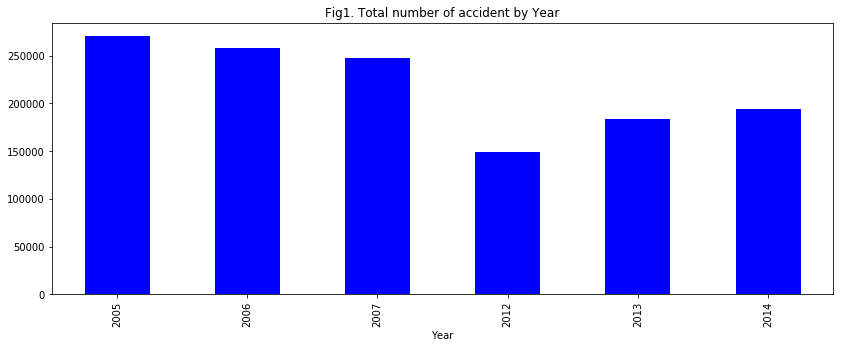

In [77]:
f,ax = plt.subplots(figsize=(14,5))
accpryr = cwrd0514.groupby('Year').sum()['Number_of_Casualties'].plot(kind='bar', ax =ax, color='b')
ax.set_title('Fig1. Total number of accident by Year');

The first decision I took was to gauge the general trend of road accidents for the two periods of time between 2005-2007 and 2012-2014 as shown by Fig1.

Between 2005-2007 there is a gradual decline in accidents from just over 260,000 in 2005 to just under 250,000 in 2007. As a result, on average between 2005 and 2007, total road incidents per year equated to 250,000. 

Between 2012-2014 road accidents were much lower with 2012 indicating 150,000 total road accidents. This year in particular was the lowest of the six years presented. However, I do see a gradual increase in road accidents in 2013 and 2014, with 2014 ending just under 200,000 in total road accidents.

The biggest difference in road accidents are shown between 2007 and 2012 with a decline of roughly 100,000 road accidents between 2007 and 2012, suggesting average decline in road accidents of 20,000 per year.

This figure does appear to be quite a substantial decline per year and one could argue that it is unrealistic. For example, if I compare this figure to the 2017 report by the Department of transport, I find that the published report indicated that total incidents for 2017 had fallen to 174,510 which was only a 5% decline from 2016. Taking this as a benchmark for average yearly decline as calculated by the Department of transport, numerically this 5% decline in accidents represents, roughly, a fall of 9184 which is almost double the amount suggested by the above bar chart. 

Thus, I cannot suggest with certainty that an average decline of 20,000 road accidents per year is an accurate and reliable reflection of the change that occurred between 2007 and 2012. What is certain however, is that road accidents overtime have appeared to fall.

With this mind it is important to understand the potential factors that may have caused this general decline and other insights that this data can provide.





# Accident Severity

My first thought was to identify the types of accident that occur. From this I could then establish related casualties associated with the severity of the incident from which potential casual factors could be drawn.

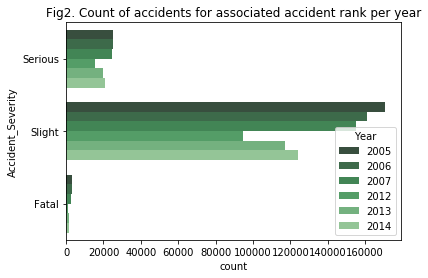

In [78]:
sns.countplot(y="Accident_Severity", hue="Year", data=cwrd0514, palette="Greens_d").set_title('Fig2. Count of accidents for associated accident rank per year');

Fig2 indicates that most accidents through out the six year period fall under the 'slight' category of accident severity with Fatal incidents for the six years cumulating to well below 200,000 incidents in total over the six years.

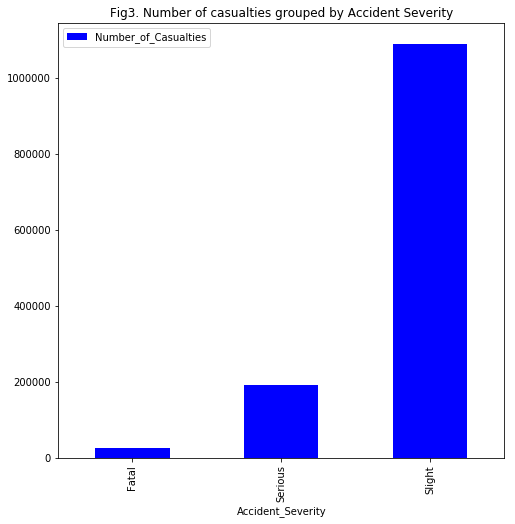

In [79]:
f,ax = plt.subplots(figsize=(8,8))
ASC = cwrd0514.groupby(['Accident_Severity']).sum()['Number_of_Casualties'].to_frame().plot(kind='bar',ax=ax, color='b')
ax.title.set_text('Fig3. Number of casualties grouped by Accident Severity')

Looking more closely at the severity of accidents the majority of incidents between 2005-2007 and 2012-2014 were categorised as 'slight' with over 1,000,000 casualties recorded to this category. On the other hand, both fatal and serious rank accidents, for these two periods cumulatively totalled 200,000 casualties. From Fig3 the only inference I can make is that minor accidents seem to occur substantially more frequently than Fatal or Serious accidents. Let's see if the severity of an accident could be related to the location of the incident itself.

In [80]:
_2005 = (cwrd0514.loc[cwrd0514['Year'] == 2005]).copy();
_2006 = (cwrd0514.loc[cwrd0514['Year'] == 2006]).copy();
_2007 = (cwrd0514.loc[cwrd0514['Year'] == 2007]).copy();
_2012 = (cwrd0514.loc[cwrd0514['Year'] == 2012]).copy();
_2013 = (cwrd0514.loc[cwrd0514['Year'] == 2013]).copy();
_2014 = (cwrd0514.loc[cwrd0514['Year'] == 2014]).copy();
#The code here is creating what could be called subsets from the orginial cwrd0514 dataset based on the year
#value. By doing this I am able to then call upon data for a specific year if required.

In [81]:
# This code is creating sample data filtering at road accident based on accident severity ranking.
_2005fatal = (_2005.loc[_2005['Accident_Severity']=='Fatal']).sample(n=1000)
_2005Slight = (_2005.loc[_2005['Accident_Severity']=='Slight']).sample(n=1000)
_2005Serious = (_2005.loc[_2005['Accident_Severity']=='Serious']).sample(n=1000)

_2012fatal = (_2012.loc[_2012['Accident_Severity']=='Fatal']).sample(n=1000)
_2012Slight = (_2012.loc[_2012['Accident_Severity']=='Slight']).sample(n=1000)
_2012Serious = (_2012.loc[_2012['Accident_Severity']=='Serious']).sample(n=1000)

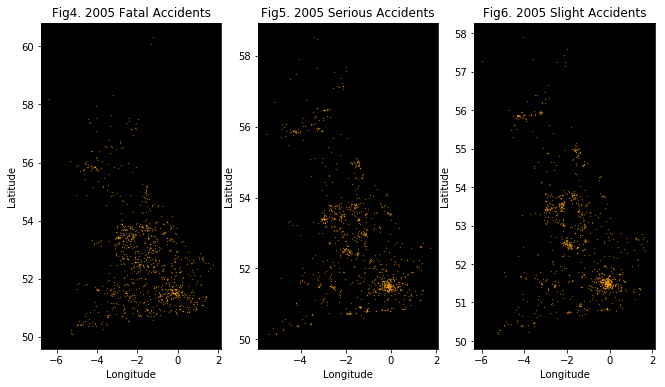

In [82]:
svplots, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(11,6))

# 2005 Fatal Severity Plot
_2005fatal.plot(kind='scatter', x='Longitude',y ='Latitude',
                color='orange', 
                s=.06, alpha=.9, subplots=True, ax=ax1)
ax1.set_title("Fig4. 2005 Fatal Accidents")
ax1.set_facecolor('black')

# 2005 Serious Severity Plot
_2005Serious.plot(kind='scatter', x='Longitude',y ='Latitude',
                color='orange', 
                s=.06, alpha=.9, subplots=True, ax=ax2)
ax2.set_title("Fig5. 2005 Serious Accidents")
ax2.set_facecolor('black')

# 2005 Slight Severity Plot
_2005Slight.plot(kind='scatter', x='Longitude',y ='Latitude',
                color='orange', 
                s=.06, alpha=.9, subplots=True, ax=ax3)
ax3.set_title("Fig6. 2005 Slight Accidents")
ax3.set_facecolor('black')



Fig4-6 are scatterplots that identify the location of incidents based on their recorded accident severity ranking specifically for 2005. The charts seem to identify clusters for accidents particularly in the south east region of the UK and parts of the West Midlands. Such clusters are likely to form in these areas of the UK as they represent developed urban areas where a large percentage of population choose to live and work. Those who live outside these areas will often travel to such regions for work as well. Therefore, it is not surprising that clusters of accidents would form in developed urban areas such as the west midlands and south east regardless of the severity ranking of the recorded road accidents. Additionally, the cluster locations appear to remain the same when we map road accidents based on accident severity ranking. 

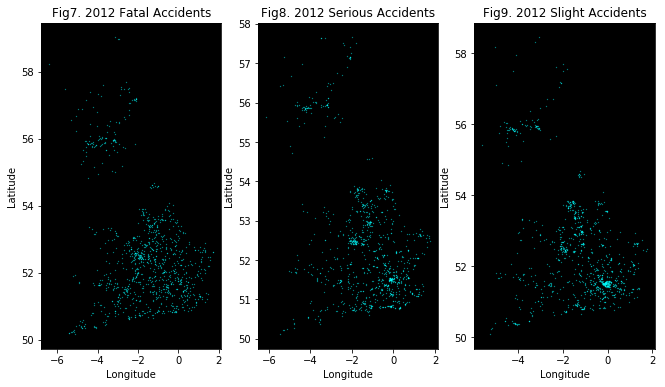

In [83]:
svplots, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(11,6))

# 2012 Fatal Severity Plot
_2012fatal.plot(kind='scatter', x='Longitude',y ='Latitude',
                color='cyan', 
                s=.05, alpha=.9, subplots=True, ax=ax1)
ax1.set_title("Fig7. 2012 Fatal Accidents")
ax1.set_facecolor('black')

# 2012 Serious Severity Plot
_2012Serious.plot(kind='scatter', x='Longitude',y ='Latitude',
                color='cyan', 
                s=.05, alpha=.9, subplots=True, ax=ax2)
ax2.set_title("Fig8. 2012 Serious Accidents")
ax2.set_facecolor('black')

# 2012 Slight Severity Plot
_2012Slight.plot(kind='scatter', x='Longitude',y ='Latitude',
                color='cyan', 
                s=.05, alpha=.9, subplots=True, ax=ax3)
ax3.set_title("Fig9. 2012 Slight Accidents")
ax3.set_facecolor('black')

Over time we find the similar cluster patterns are followed in 2012 as they were in 2005 as illustrated in Fig7-9. One key difference between the 2005 and 2012 scatterplots are shown by fatal accidents. In 2005 accident clusters appear to be more prominent whereas in 2012 they appear to be more dispersed across the UK. In 2012 particularly, the cluster map for fatal accidents displays a more widely dispersed and even illustration of fatal accidents occurrences across the UK. Additionally, 2012 serious and slight accident severity rankings show their clusters to be less prominent than those in 2005.

As a result, we can discern that the location of an incident does not necessarily affect the severity ranking associated with said incident. Consequently, if severity of accidents is not influenced by geographical data, then this suggest that there are other factors need to be considered when determining causal factors of road accidents.

# Weather Conditions

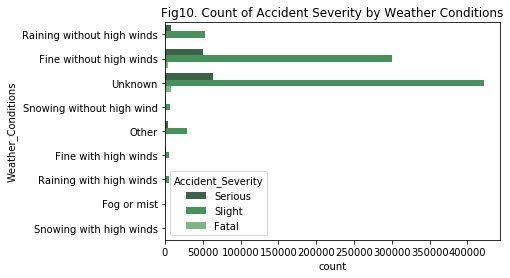

In [84]:
sns.countplot(y="Weather_Conditions", hue="Accident_Severity", data=cwrd0514, palette="Greens_d").set_title('Fig10. Count of Accident Severity by Weather Conditions');


Weather conditions seemed to be the next logical step to analyse. Frequently, weather warnings on local news suggest avoiding travelling on the road in poor weather conditions, so there may be some relationship between weather conditions and accident severity.  Ignoring the unknown category Fig10 illustrates what appears to be an inverse relationship between accident severity and weather conditions where fine without high winds actually has more instances of all three types of accidents than Raining without winds. 

In [85]:
wccas = (cwrd0514[['Weather_Conditions','Number_of_Casualties','Year','Accident_Severity']]).copy(deep=True);
sample = wccas.sample(n=1000)
sample2 = sample.drop((sample[sample.Weather_Conditions=='Unknown'].index),inplace=True)

Text(0.5,1,'Fig11. Number of Casualties by Weather Conditions and Accident Severity')

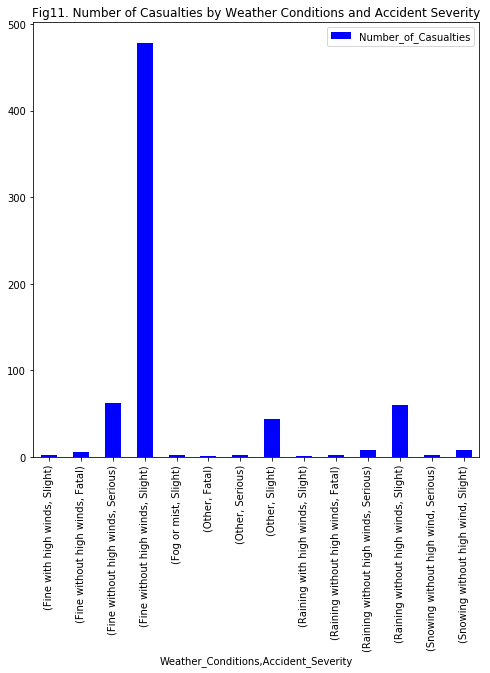

In [86]:
f,ax = plt.subplots(figsize=(8,8))
WCC = sample.groupby(['Weather_Conditions','Accident_Severity']).sum()['Number_of_Casualties'].to_frame().plot(kind='bar',ax=ax, color='b')
ax.set_title("Fig11. Number of Casualties by Weather Conditions and Accident Severity")

When I introduce number of casualties to the mix I find that this supports the inverse relationship between adverse weather conditions and accident severity. Fig11 illustrates significantly larger number of casualties for weather conditions such Fine without high winds + Slight severity accidents with a count of 400 casualties. Yet when I look at the same severity ranking but for the Raining with high winds casualties are equate to less than 50. An explanation for this inverse relationship could be due to the type of climate that the UK experiences. Through my own personal experience, snow weather conditions are far less frequent than rain or fine weather conditions, so naturally the occurrence of accidents during snow weather conditions are likely to be smaller.  

Once again it is unclear whether weather conditions can be recognized as a signifcant causal factor of road accidents.

# Are there any relationships?

At this point I decided to produce a correlation matrix of all the variables from the main c0514 data frame. A correlation matrix is particularly useful in deciphering potential relationships between variables in a dataset. Correlation matrices work by determining the correlation coefficients of all variables with one another including itself. The correlation coefficients are values between -1 and 1 produced for each relationship with values of 1 signifying either a perfect positive or negative relationship. The code below is the correlation matrix for the c0514 dataset.

In [87]:
c0514.corr()

,Unnamed: 1,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),Road_Type,...,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Year,Junction_Control,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Weather_Conditions,Road_Surface_Conditions
Unnamed: 1,1.000000,-0.124190,0.015120,0.280672,-0.017483,0.002053,0.007293,-0.003249,0.287908,0.014431,...,0.007172,0.008190,0.090458,-0.005468,0.141501,-0.019256,0.008991,0.029493,0.048425,-0.022387
Longitude,-0.124190,1.000000,-0.418477,-0.389437,0.015899,0.022625,-0.034747,-0.004114,-0.409986,0.001634,...,-0.010338,-0.007417,-0.087554,0.007199,0.053420,0.042610,-0.025685,-0.043855,-0.049194,0.056604
Latitude,0.015120,-0.418477,1.000000,0.186864,-0.033722,-0.042230,0.030354,0.005032,0.135406,-0.008472,...,0.005856,0.011686,0.040747,-0.012250,-0.039829,-0.022115,0.034388,0.038716,0.045476,-0.034056
Police_Force,0.280672,-0.389437,0.186864,1.000000,-0.036140,-0.017934,0.008416,0.000753,0.980890,0.025155,...,0.022252,0.030109,0.234935,-0.018083,0.013757,-0.064952,0.030944,0.058826,0.020099,-0.048353
Accident_Severity,-0.017483,0.015899,-0.033722,-0.036140,1.000000,0.073047,-0.093606,0.002201,-0.036755,0.047961,...,0.003690,-0.001169,-0.084993,0.116088,-0.004629,0.053530,0.007829,-0.015500,-0.004287,0.000446
Number_of_Vehicles,0.002053,0.022625,-0.042230,-0.017934,0.073047,1.000000,0.234228,-0.000611,-0.013051,0.042673,...,-0.012182,-0.031234,0.042385,-0.032679,-0.007564,0.065358,-0.019544,-0.006547,-0.008474,-0.009221
Number_of_Casualties,0.007293,-0.034747,0.030354,0.008416,-0.093606,0.234228,1.000000,-0.001927,0.015280,-0.010288,...,0.012096,0.007337,0.119730,-0.107020,-0.019592,-0.031403,-0.007055,-0.000029,0.011979,-0.032218
Day_of_Week,-0.003249,-0.004114,0.005032,0.000753,0.002201,-0.000611,-0.001927,1.000000,0.000501,-0.005818,...,-0.003250,-0.004345,-0.016567,0.004580,-0.005083,0.004380,-0.002113,0.001980,0.001002,-0.001514
Local_Authority_(District),0.287908,-0.409986,0.135406,0.980890,-0.036755,-0.013051,0.015280,0.000501,1.000000,0.025742,...,0.023289,0.030332,0.247473,-0.014944,0.010454,-0.062105,0.028214,0.065322,0.025337,-0.049799
Road_Type,0.014431,0.001634,-0.008472,0.025155,0.047961,0.042673,-0.010288,-0.005818,0.025742,1.000000,...,-0.006560,-0.013629,0.036283,0.045690,-0.007586,0.094828,-0.005757,0.030257,0.014330,-0.000169


We can see that a lot of the relationships appear to be quite weak with many producing values of less than 0.1. However, we can model this better using the following code to produce a correlation plot.

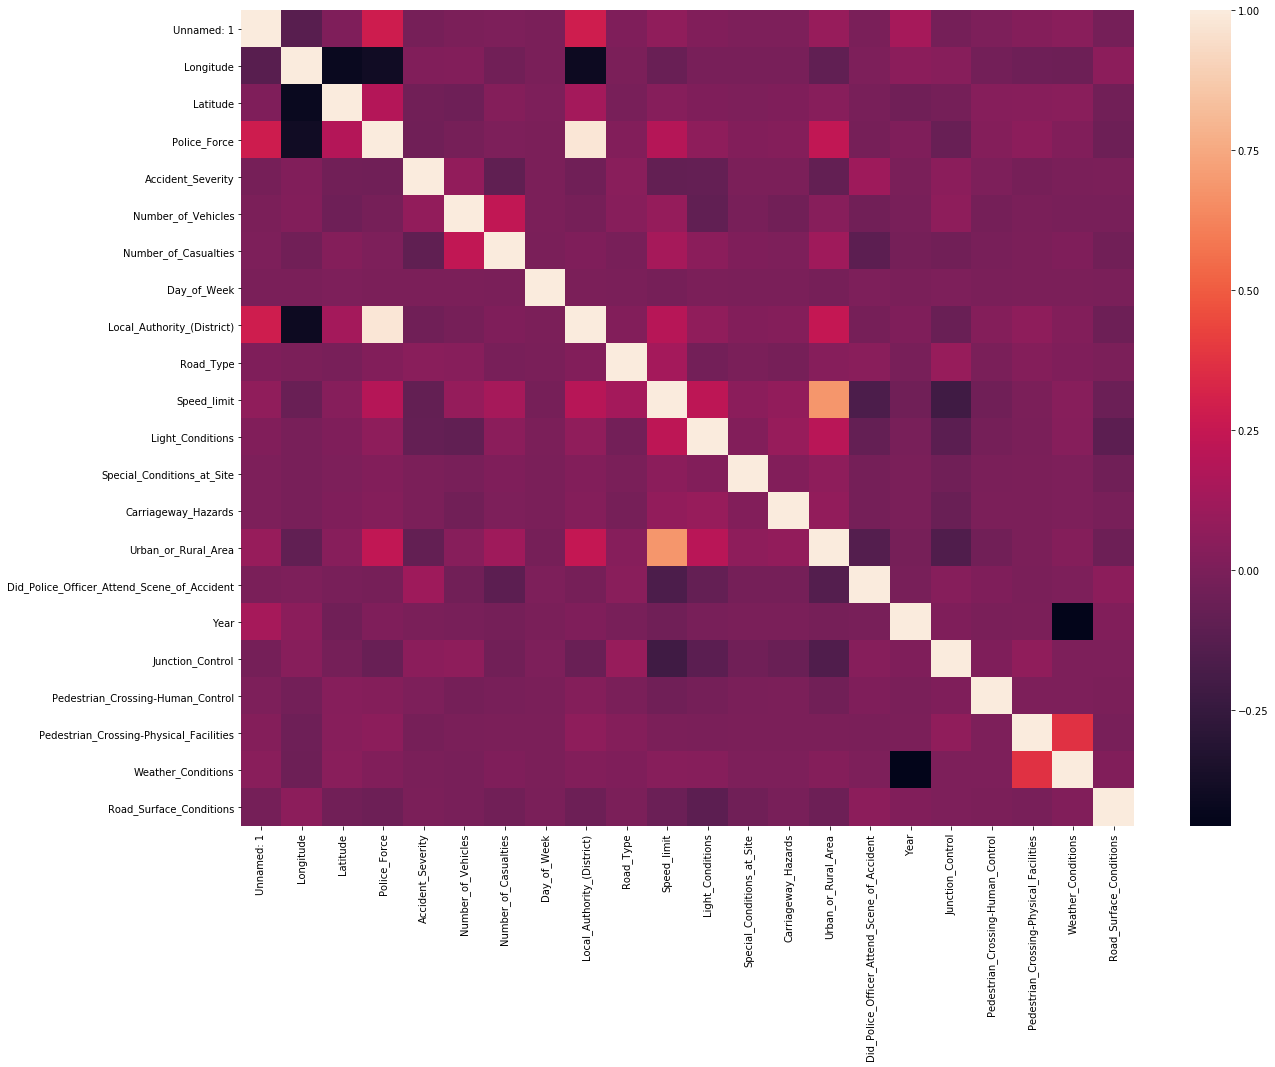

In [88]:
corr = c0514.corr()
plt.subplots(figsize=(20,15))
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

Now that I have visualised the strength of relationships between each variable, I ideally want to look at the number of casualties and its relationship with other variables. Looking at the correlation plot I can see that most variables have a very weak relationship with Number of Casualties as correlation coefficients  appear to lie between -0.25 and 0. The two variables that do appear have an impact are accident severity and number of vehicles. 

Comparing number of casualties with accident severity, I find that there is a weak negative correlation equivalent to -0.093606. This suggests that as the number of casualties increase the rating associated with the severity of an accident decreases by 0.093606 and vice versa. This supports previous analysis conducted and illustrated by Fig11. 
The second relationship between number of casualties and number of vehicles is far stronger with a correlation coefficient of 0.234. This suggests as number of casualties increase the number vehicles involved in an accident will also increase and vice versa. 

This analysis though simple could be useful for helping emergency services to develop an understanding of road accident factors, as correlation matrices help establish statistical relationships between variables providing potential direction to focus research.

# Predictive Model on Police attendance at Accident site

Another manner in which analysis of data could help accident services is through predictive modelling. Predictive modelling enables forecasting of a target variable. This is achieved by defining a variety of predictor variables that are likely to influence the results of the target variable, collecting data for these predictors, and applying an algorithm to the data and predictor variables to generate a model.

The algorithm I will be applying is the Random Forest Classifier. I chose to implement the Random Forest Classifier as it is widely accepted, effective and accurate method of creating models using categorical data(Fawagreh et al, 2014). The Random Forest Classifier is an ensemble method of predictive modelling. In essence, where a  singular decision tree algorithm will only create one decision tree an ensemble method, or Random Forest Classifier in this case, will generate multiple decision trees before determining an average prediction value. Note though, ensemble methods are not limited to generating to multiple decision trees and can generate other models. Ensemble models are very beneficial because they attempt to minimise problems of overfitting data. Overfitting is a big problem as can be thought of as the predictive model being unable to predict accurate outcomes on unseen data, that is the model is likely to generate inaccurate results when new data introduced. Random Forest Classifier overcomes this issue as more decision tree are generated, known as the strong law of large numbers (Pal, 2005).  

As per the subtitle I will be attempting to generate a predictive model on Police attendance at a road accident site. Prior to deciding on generating this specific model I had attempted to implement predictive models on other variables, such as accident severity, in this dataset, but came across a crucial problem of the Random Forest Classifier. The key issue is that the Random Forest Classifier is best suited to dealing with binary problems, that is problems where target variables have at maximum to value types or class types.

Most of the data in this dataset have multiple class types and therefore implementation of a standard Random Forest Classifier would not be possible. That said I do believe there is some value in generating this model. Though it may not directly aid in reducing casualty numbers from road accidents, modelling prediction of police attendance at accident sites may provide some use in improving quality of emergency services as police attendance at accident site should always occur. Thus, predicting police attendance given certain accident features could prove useful to improve resource allocation.

In [89]:
from sklearn.preprocessing import LabelEncoder
import random
from sklearn.ensemble import RandomForestClassifier

In [90]:
fulldata= c0514.copy(deep=True)

In [91]:
train=fulldata.sample(frac=0.8,random_state=200)
test=fulldata.drop(train.index)

train['Type']='Train' #defines indicator for Train and Test Data set
test['Type']='Test'
fullData = pd.concat([train,test],axis=0) #Combined both Train and Test Data set
fulldata3 = fullData.copy(deep=True)

The first step in generating a model is dividing the dataset into train and test data. Train data as the name suggest is where I will train the model. The test dataset is used to apply the model that has been trained to create a prediction.

In [92]:
ID = ['Unnamed: 1']
target = ['Did_Police_Officer_Attend_Scene_of_Accident']
category = ['Urban_or_Rural_Area','Police_Force','Day_of_Week','Local_Authority_(District)','Local_Authority_(Highway)','Road_Type','Speed_limit','Light_Conditions', 'Special_Conditions_at_Site', 'Carriageway_Hazards','Did_Police_Officer_Attend_Scene_of_Accident','Junction_Control','Pedestrian_Crossing-Human_Control','Pedestrian_Crossing-Physical_Facilities','Weather_Conditions','Road_Surface_Conditions','Accident_Severity']
data = ['Date','Time','Year','Longitude','Latitdue','Unnamed: 0', 'Type']
numerical = list(set(list(fulldata3.columns))-set(category)-set(ID)-set(target)-set(data))

After this is done the next step is to define the features of the model. Here I have split the variables in the dataset into ID category, target (what we what to predict), category(categorical variables)  and data(variables not being used in the model). This is a useful step to conduct as it will easily let me alter the features of the model.

In [93]:
#create label encoders for categorical features
for x in category:
 number = LabelEncoder()
 fulldata3[x] = number.fit_transform(fulldata3[x].astype('str'))
fulldata4 = fulldata3.copy(deep=True)

#Target variable is also a categorical so convert it
fulldata4["Did_Police_Officer_Attend_Scene_of_Accident"] = number.fit_transform(fulldata4['Did_Police_Officer_Attend_Scene_of_Accident'].astype('str'))
fulldata5 =fulldata4.copy(deep=True)

train= (fulldata5.loc[fulldata5['Type']=='Train']).copy(deep=True)
test= (fulldata5.loc[fulldata5['Type']=='Test']).copy(deep=True)


This step ensures that the data is encoded with a numerical label to allow the algorithm to function correctly. 

In [94]:
train['traint'] = np.random.uniform(0, 1, len(train)) <= .80
Train, Validate = train.loc[train['traint']==True], train.loc[train['traint']==False]
features=list(set(list(fulldata5.columns))-set(ID)-set(target)-set(data))
x_train = Train[list(features)].values
y_train = Train['Did_Police_Officer_Attend_Scene_of_Accident'].values
x_validate = Validate[list(features)].values
y_validate = Validate['Did_Police_Officer_Attend_Scene_of_Accident'].values
x_test=test[list(features)].values

I then further split the training dataset into train and validation set. The purpose of this is to replicate applying the final model but in on our training data. I therefore need to split the training dataset into train and validation.

In [95]:
from sklearn.preprocessing import LabelEncoder
import random
from sklearn.ensemble import RandomForestClassifier

random.seed(100)
rf = RandomForestClassifier(n_estimators=100)
rf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

I then apply the algorithm to the training data. The number of estimators are the number of decision trees we want the algorithm to produce before determining an average of the predictions made from the trees.
The output that is shown from the Random Forest Classifier displays the characteristics of the trained classifier.

In [96]:
from sklearn.metrics import roc_curve, auc

status = rf.predict_proba(x_validate) #here we applying the training model to the training validation set
fpr, tpr, _ = roc_curve(y_validate, status[:,1]) # calculate the false positive and true positive rates of the model
roc_auc = auc(fpr, tpr) #generates an roc value which defines the model accuracy
print(roc_auc) #outputs the accuracy value of the model.

final_status = rf.predict_proba(x_test) # applies model to the test data
test['Did_Police_Officer_Attend_Scene_of_Accident']=final_status[:,1] # adds the prediction values to the test dataframe

0.6754540837468883


The final step is applying the trained model to our test data. I have also generated and ROC_AUC value. The ROC_AUC is an important figure as it defines the accuracy of the model as shown above. A  ROC_AUC value can span between 0.5 and 1 with a value of 0.5  indicating a model that is randomly predicting the classification of an observation - randomly predicting whether police attend and accident, and a value of 1 perfectly predicting the classification of an observation. The model I created attained a value of 0.67 which suggest that it is weak in its accuracy of predicting police attendance at a road accident site. 

However, this leaves room for further investigation to experiment with other features that may improve the AUC of this model and thus better predict Police attendance at road accident sites.

# Conclusion and Furture Research

Throughout this process of analysis the main insight from the data appears to suggest that environmental factors such as weather conditions have a weak inverse relationship to the number of casualties recorded at accident sites. The graphs created illustrate that casualties are most recorded during fine weather conditions compared to weather such as rain or even fog and mist. Similarly, most accidents recorded are categorised as a 'slight' severity compared to 'fatal' or 'serious'. Yet, regardless of accident severity, geographically accidents tend to occur in clusters in roughly the same regions. Naturally, I would think that better weather conditions should lead to less recorded casualties from road incidents, but this does not appear to be the case. Yet we cannot say with certainty what the root cause to this insight is. As a result, its application to emergency services units are limited but does provide a good starting point into further research.

Better interpretations could be made by pairing this data with driver data related to these incidents. Driver data could have a large influence in analysis and predictive modelling of road accidents and may provide some insight where data on environmental factors have not been able to. Referring back to Fig11, I saw that fine road conditions seemed to cause a greater number of casualties than weather conditions such as rain or even snow and though these weather conditions occur less frequently one would expect casualties from more dangerous weather conditions to lead to more casualties. That said we do not have enough data to confirm or disprove this statement. This is where I believe additional data such as driver information could provide some further insight to explain these unusual observations from which true benefits to emergency services can be generated and utilised to its fullest.


# References

Abdel-Aty, M. and Radwan, A. (2000). Modeling traffic accident occurrence and involvement. Accident Analysis & Prevention, [online] 32(5), pp.633-642. Available at: https://www.sciencedirect.com/science/article/pii/S0001457599000949 [Accessed 21 Apr. 2018].

Anderson, T. (2009). Kernel density estimation and K-means clustering to profile road accident hotspots. Accident Analysis & Prevention, [online] 41(3), pp.359-364. Available at: https://www.sciencedirect.com/science/article/pii/S0001457508002340#bib1 [Accessed 21 Apr. 2018].

Assets.publishing.service.gov.uk. (2018). Report Road Casualties in Great Britain: quarterly provisional estimates ending September 2017. [online] Available at: https://assets.publishing.service.gov.uk/government/uploads/system/uploads/attachment_data/file/681593/quarterly-estimates-july-to-september-2017.pdf [Accessed 21 Apr. 2018].

Doc.ukdataservice.ac.uk. (2018). Road Accident Data - GB : Variables and Values. [online] Available at: http://doc.ukdataservice.ac.uk/doc/7752/mrdoc/pdf/7752_ukds_user_guide_2014.pdf [Accessed 21 Apr. 2018].

Fawagreh, K., Gaber, M. and Elyan, E. (2014). Random forests: from early developments to recent advancements. Systems Science & Control Engineering, [online] 2(1), pp.602-609. Available at: https://www.tandfonline.com/doi/full/10.1080/21642583.2014.956265 [Accessed 21 Apr. 2018].

Kaggle.com. (2018). 1.6 million UK traffic accidents | Kaggle. [online] Available at: https://www.kaggle.com/daveianhickey/2000-16-traffic-flow-england-scotland-wales [Accessed 21 Apr. 2018].

Pal, M. (2005). Random forest classifier for remote sensing classification. International Journal of Remote Sensing, [online] 26(1), pp.217-222. Available at: https://www.tandfonline.com/doi/full/10.1080/01431160412331269698?needAccess=true&instName=UCL+%28University+College+London%29 [Accessed 21 Apr. 2018].

Total Word Count: 3744